<a href="https://colab.research.google.com/github/semla/notebooks/blob/master/fmnist_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies & import
Install Keras and Tensorflow using pip.

In [0]:
!pip install -U keras tensorflow>=1.8.0 

Import statemets and use gpu

In [0]:
# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.preprocessing import image
from keras.models import Sequential # For sequential models, not functional
from keras.layers import Dense, Activation,MaxPooling2D, Dropout, Conv2D, Flatten # the layers used
from keras.datasets import fashion_mnist
from keras.utils import to_categorical # one-hot encoding

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # tensorflow is the backend

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Using GPU at: {}'.format(device_name))


Using TensorFlow backend.


Using GPU at: /device:GPU:0


# Load data & some preprocessing

In [0]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


4423680/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Normalization  & add a dimension for channel. Even if it is black & white images Keras wants a number for channels.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# the preprocess_input wants samples, x-values, y-values and channels
# since black & white only one channel, we need to add it?
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train[0][0][0])

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


[0.]


In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Explore the data.
Take a look at the y_train which, is now one-hot-encoded.
Print the matrix of pixel values representing an image.
Print the actual image.

Row number 2 of the labels: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Category 8 is Sneaker
The matrix of pixel values for sample 2:
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.5 0.4 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.

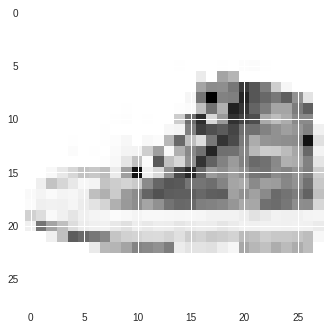

In [0]:
# Choose one of the 60000 training samples
img_index = 2
# y_train contains the lables, ranging from 0 to 9
print("Row number " + str(img_index) +" of the labels: " + str(y_train[img_index]))
# print(type(y_train[img_index]))
label_index=np.argmax(y_train[img_index])
#label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("Category "+str(label_index+1) + " is " +(fashion_mnist_labels[label_index]))
#print(y_train[2].shape)
#print(x_train[0])

# # Show one of the images from the training dataset

# reshaping neccessary to only show the columns with actual pixel data (not the one added with reshape above)
img=x_train[img_index].reshape(28,28)
np.set_printoptions(linewidth=125)
print("The matrix of pixel values for sample " + str(img_index) + ":\n" + str(np.around(img,1)))
# img =img.reshape(28,28)
plt.imshow(img)




# The model
##Create the model and add layers

In [0]:
my_model = Sequential()

my_model.add( Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu', input_shape=(28,28,1))) 
my_model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)))
my_model.add( Dropout(rate=0.3))

my_model.add( Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
my_model.add( MaxPooling2D(pool_size=2))
my_model.add( Dropout(0.3))

my_model.add( Flatten())
my_model.add( Dense(256, activation='relu'))
#my_model.add( Dropout(0.5))
my_model.add( Dense(10, activation='softmax'))

# print the number of layers
print('Number of layers: ' + str(len(my_model.layers)))

# print sumary of the model and its layers
my_model.summary()

Number of layers: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        65600     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0

##Compile the model

In [0]:
my_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             #optimizer='SGD',
             #optimizer='RMSProp',
             metrics=['accuracy'])

## Training
Save training to history

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best.hdf5', verbose = 1, save_best_only=True)
bs = 64
ep = 10

history = my_model.fit(x_train,
         y_train,
         batch_size=bs,
         epochs=ep,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 254us/step - loss: 0.4632 - acc: 0.8312 - val_loss: 0.3111 - val_acc: 0.8876

Epoch 00001: val_loss improved from inf to 0.31115, saving model to best.hdf5
Epoch 2/10
55000/55000 [==============================] - 13s 227us/step - loss: 0.3042 - acc: 0.8898 - val_loss: 0.2577 - val_acc: 0.9064

Epoch 00002: val_loss improved from 0.31115 to 0.25766, saving model to best.hdf5
Epoch 3/10
55000/55000 [==============================] - 12s 227us/step - loss: 0.2644 - acc: 0.9015 - val_loss: 0.2442 - val_acc: 0.9108

Epoch 00003: val_loss improved from 0.25766 to 0.24421, saving model to best.hdf5
Epoch 4/10
55000/55000 [==============================] - 13s 228us/step - loss: 0.2385 - acc: 0.9108 - val_loss: 0.2180 - val_acc: 0.9164

Epoch 00004: val_loss improved from 0.24421 to 0.21798, saving model to best.hdf5
Epoch 5/10
55000/55000 [==============================] - 13s 227us

## Plot feature map

mount google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Function to save image to google drive

In [0]:
import datetime
def save_png(name,ep,bs):
  date = datetime.datetime.now()
  date = date.strftime("%y%m%d%H%M%S")
  print(date)
  filename = name + '-' + date
  if ep != 0:
    filename += '-'+str(ep)+'epochs-'+str(bs)+'batch-size.png'
  
  plt.savefig('/content/gdrive/My Drive/'+filename, bbox_inches='tight')  
  print('file probably saved to: ' + filename)
 # with open('/content/gdrive/My Drive/'+filename , 'w') as f:
 #   f.write('content')

In [0]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in my_model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=my_model.input, outputs=layer_outputs)

print(len(my_model.layers))
print(len(activation_model.layers))


9
7


(28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 64)
190102164842
file probably saved to: feature-map-190102164842


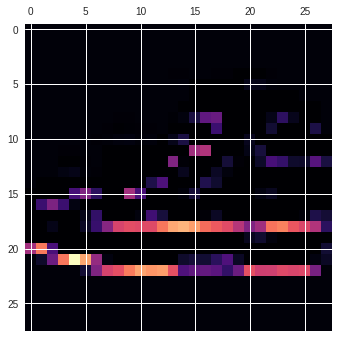

(1, 28, 28, 64)

In [0]:
img_tensor = x_train[img_index]
print(img_tensor.shape)
img_tensor = img_tensor.reshape(1,28,28,1)
print(img_tensor.shape)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 0], cmap='magma')
save_png('feature-map',0,0)
plt.show()

first_layer_activation.shape

## Plot success

<class 'dict'>
4
10
190102184236
file probably saved to: acc-190102184236-10epochs-64batch-size.png


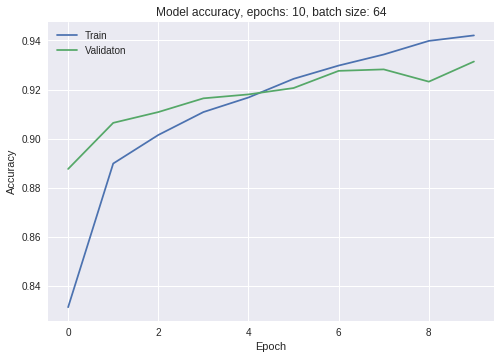

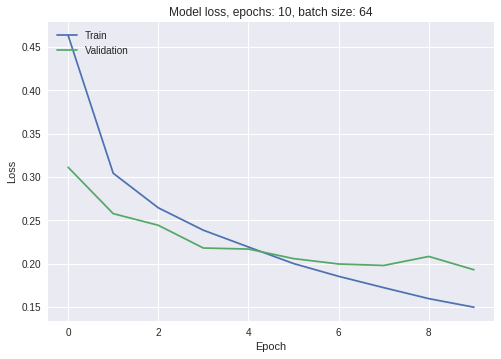

In [0]:
print(type(history.history))
print(len(history.history))
print(len(history.history['loss']))
# print(history.history)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy, epochs: ' + str(ep) + ', batch size: ' + str(bs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.axis([0, len(history.history['loss']),0,1])
plt.legend(['Train', 'Validaton'], loc='upper left')
save_png('acc',ep,bs)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss, epochs: '+ str(ep) + ', batch size: ' + str(bs))
plt.ylabel('Loss')
plt.xlabel('Epoch')

#plt.axis([0, len(history.history['loss']),0,1])
plt.axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


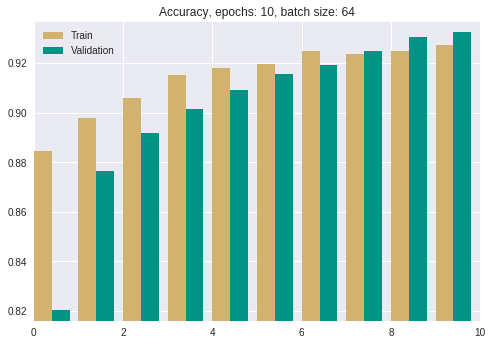

190102180036
file probably saved to: loss-190102180036-10epochs-64batch-size.png


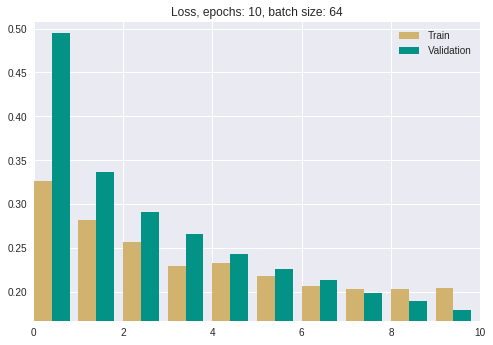

In [0]:
X = np.arange(0,len(history.history['acc']))
padding = (max(history.history['val_acc'])- min(history.history['val_acc'])) /10
bar_width = 0.4

plt.title('Accuracy, epochs: ' + str(ep) + ', batch size: ' + str(bs))
plt.bar(X, history.history['val_acc'], bar_width, color='xkcd:tan',align='edge')
plt.bar(X + bar_width, history.history['acc'], bar_width, color='xkcd:teal',align='edge')

min_y = min(min(history.history['val_acc']),min(history.history['acc'])) -padding
max_y = max(max(history.history['val_acc']),max(history.history['acc'])) + padding

plt.axis([0, len(history.history['val_acc']), min_y, max_y])
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


X = np.arange(0,len(history.history['loss']))
padding = (max(history.history['val_loss'])- min(history.history['val_loss'])) /10
bar_width = 0.4

plt.title('Loss, epochs: ' + str(ep) + ', batch size: ' + str(bs))
plt.bar(X, history.history['val_loss'], bar_width, color='xkcd:tan',align='edge')
plt.bar(X + bar_width, history.history['loss'], bar_width, color='xkcd:teal',align='edge')

min_y = min(min(history.history['val_loss']),min(history.history['loss'])) -padding
max_y = max(max(history.history['val_loss']),max(history.history['loss'])) + padding

plt.axis([0, len(history.history['val_loss']), min_y, max_y])

plt.legend(['Train', 'Validation'], loc='upper right')


save_png('loss',ep,bs)
plt.show()

In [0]:
# min(history.history['val_loss'])
import os
print( os.getcwd() )
print( os.listdir() )



/content
['.config', 'best.hdf5', 'gdrive', '=1.8.0', 'sample_data']


##Evaluate the model
//Try the model using only the pretrained downloaded weights
Evaluat the model

In [0]:
my_model.load_weights('best.hdf5')

preds = my_model.predict(x_train)


# Evaluate the model on test set
score = my_model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])




 Test accuracy: 0.9231
